# Моделирование сборки липидного бислоя в GROMACS

In [2]:
from IPython.display import Image, Video

В этом практикуме мы будем моделировать сборку липидного бислоя из смеси липидов и воды методом молекулярной динамики в программе GROMACS. Для начала приготовим систему, состоящую из 64 молекул липидов и около 3000 молекул воды. Ниже приведены изображения системы до и после "утряски" воды. Можно заметить, что положение молекул воды изменилось.

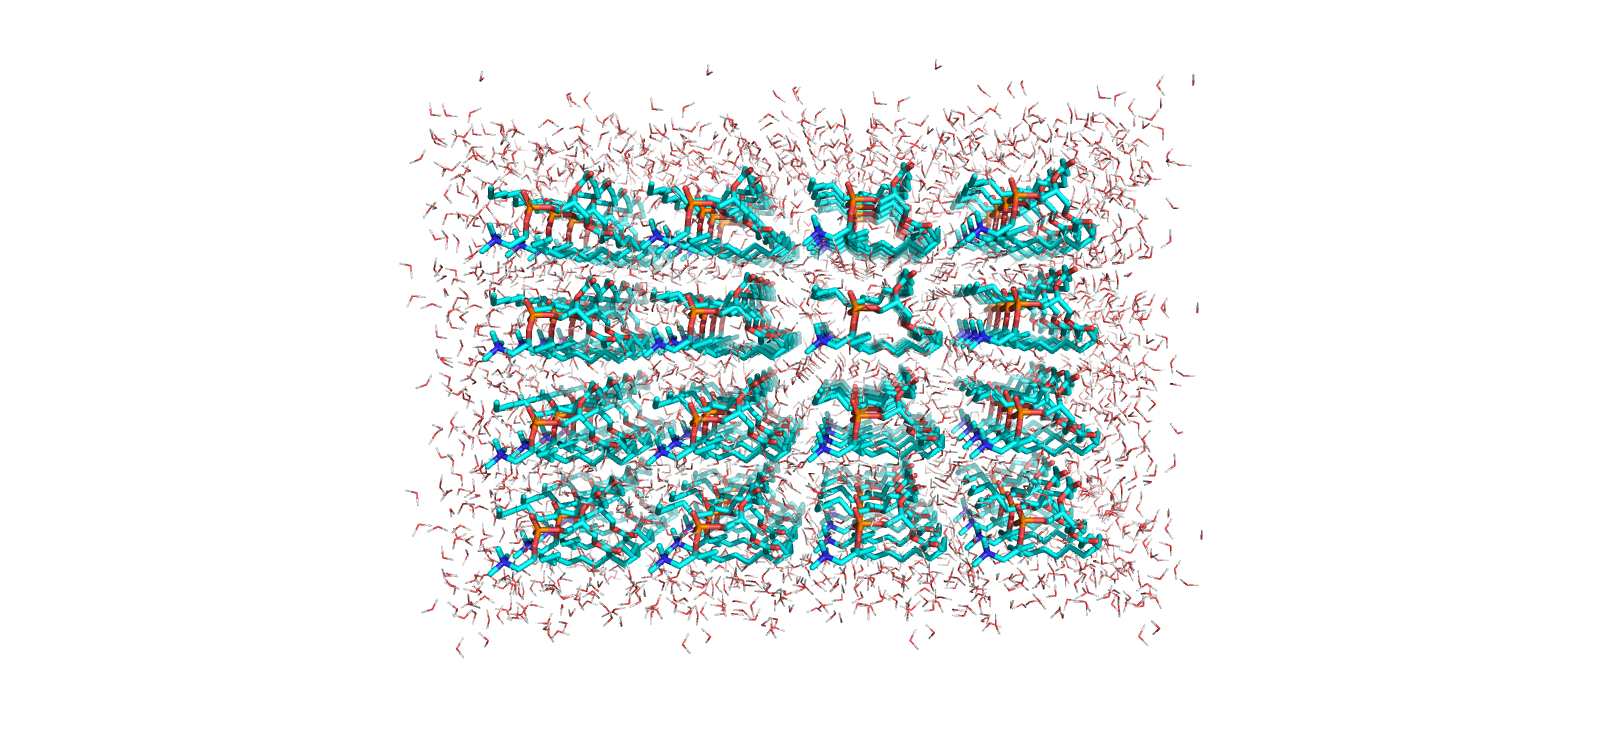

In [3]:
Image('b_s.png', width=1000)

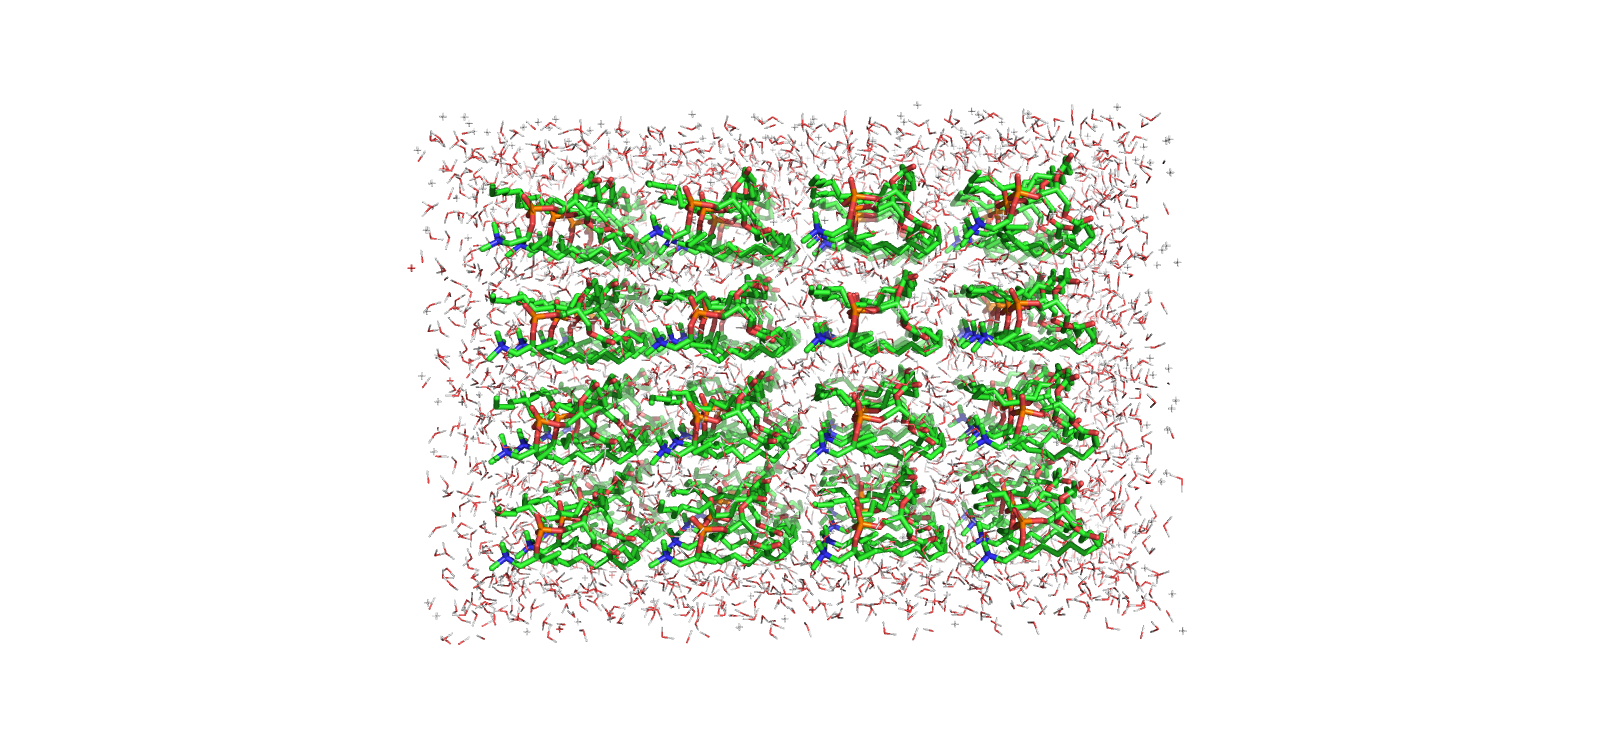

In [4]:
Image('b_pr.png', width=1000)

В качестве силового поля брался файл gmx.ff. Размер ячейки вдоль трёх осей: 6.26000   4.44300   5.77800 нм. В качестве модели раствортеля использовалась spc-вода. При утряске растворителя неподвижными сохранялись все связи в липидах. Шаг брался 0.0002 пс, максимальное число шагов - 1000. Тип термостата - velocity rescaling, баростат не использовался. Для молекулярной динамики длина шага была 0.005 пс, максимальной число шагов - 10000000. Тип интегратора - md, термостат - velocity rescaling, баростат по Берендсену.

Ниже представлены результаты моделирования с отображением молекул воды и без него.

In [5]:
Video('mol_dynamics.mp4', height=400)

In [6]:
Video('mol_dynamics_water.mp4', height=400)

Моделирование прошло успешно, молекулы липидов как и ожидалось сформировали упорядоченную структуру. О том, что молекулы липидов выстраиваются по отнощению к воде определённым образом, можно точно говорить начиная с 10 модели, что соответствует моменту времени t = 4500 пс. При этом полного формирования бесконечного бислоя так и не происходит: у него всё время сохраняются края, пространство между которыми заполнено водой.

С помощью команды gmx sas рассчитаем общую поверхность липидов, доступную для растворителя на каждом шаге. Результат визуализировался с помощью программы grace.

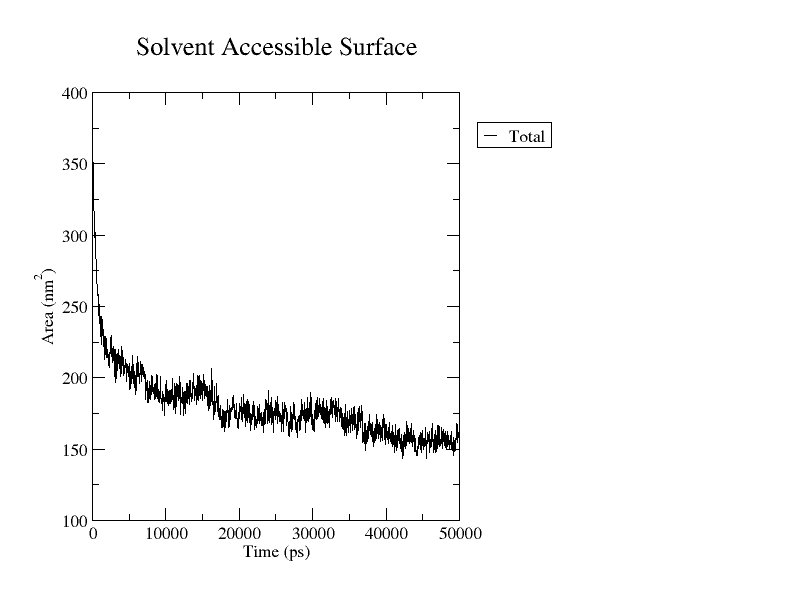

In [9]:
Image('sas_b.png', width=600)

Общая поверхность, доступная растворителю, в начале составляла 350 нм^2, а затем резко упала до 200 и ещё какое-то время продолжала уменьшаться, в результате упав суммарно более чем в два раза. Это легко объясняется тем, что гидрофобные хвосты в ходе динамики прижимаются друг к другу и защищают друг друга от соприкосновения с водой.

Проследим за тем, как изменялись размеры ячейки в ходе моделирования с помощью команды gmx traj. Ниже приведён график изменения величины ячейки вдоль трёх осей, полученный с помощью grace.

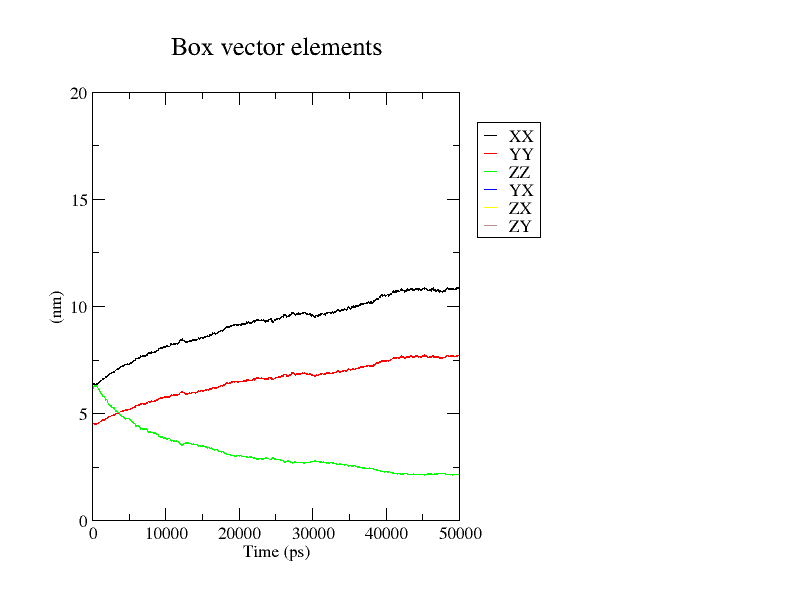

In [10]:
Image('box_1.png', width=600)

Здесь ось Y смотрит перпендикулярно поверхности бислоя, оси X и Z направлены параллельно поверхности. Можно было бы исходя из этих даных посчитать площадь поверхности бислоя, приходящуюся на одну молекулу липида, однако сделать это затруднительно по причине того, что липидный бислой сформировался не полностью.

Наиболее популярной мерой оценки упорядоченности молекул липидов в бислое является т.н. параметр порядка, получаемый экспериментально из данных ЯМР с использованием дейтерия. Чем он меньше (более отрицателен), тем более упорядоченно расположены соответствующие атомы углерода в липидах. Расчитаем этот параметр для каждого атома углерода молекул фосфолипидов для начала и конца траектории с помощью команды gmx order.

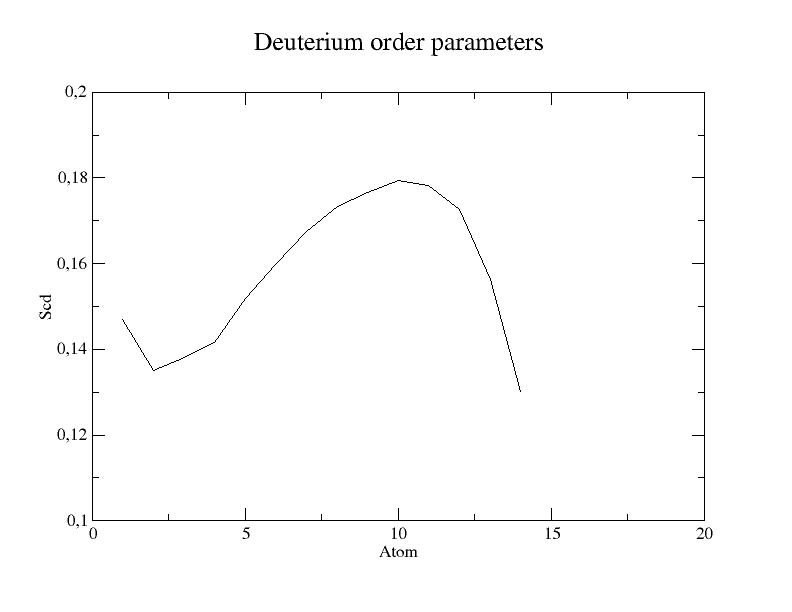

In [8]:
Image('dueter.png', width=500)

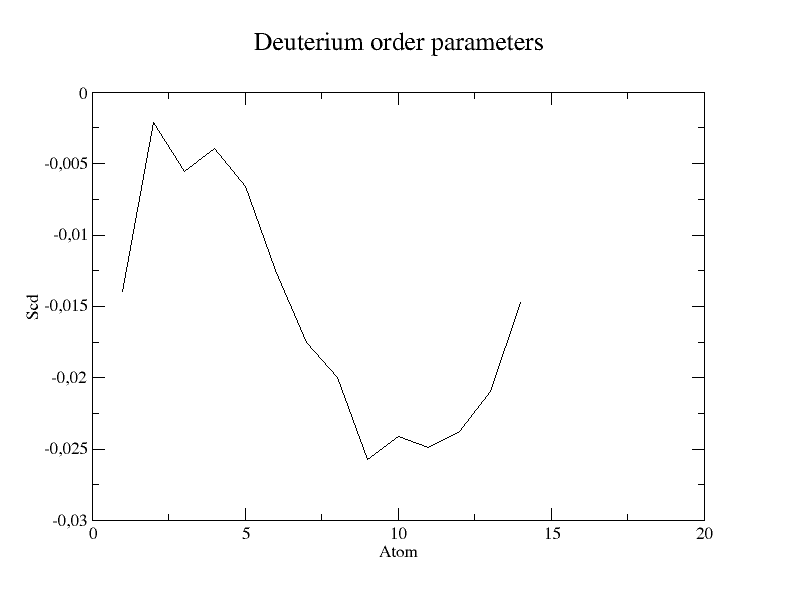

In [9]:
Image('dueter_2.png', width=500)

Заметим, что по сравнению с началом моделирования в конце параметр порядка стал меньше, т.е. молекулы липидов стали более упорядоченными. Также обращает на себя внимание падение параметра во втором случае в районе 10 атома, что скорее всего указывает на наличие там двойной связи, дополнительно упорядочевающей хвосты фосфолипидов.